# Plant Disease Identification

This Jupyter Notebook aims to implement a Convolutional Neural Network (CNN) for the identification of plant diseases based on images. Accurate and timely identification of plant diseases is crucial for effective agricultural management, enabling early intervention and mitigation strategies.

## About Dataset

This dataset is recreated using offline augmentation from the original dataset. The original dataset can be found on this github repo. This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. A new directory containing 33 test images is created later for prediction purpose.

## **Using Dataset from Kaggle**

In [2]:
#1.install kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usmanbvp","key":"31fd61963e8c0299d2da401011e16053"}'}

In [5]:
#create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [8]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          17910        354  0.9411765        
syedanwarafridi/vehicle-sales-data                          Vehicle Sales Data                              19MB  2024-02-21 20:16:17          24254        392  1.0              
alistairking/natural-gas-usage                              Natural Gas Usage (2014-Now)                   490KB  2024-03-31 02:31:28            601         29  1.0              
bhavikjikadara/student-study-performance                    Student Study Performance                    

In [9]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:19<00:00, 220MB/s]
100% 2.70G/2.70G [00:19<00:00, 145MB/s]


In [10]:
!unzip new-plant-diseases-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

**Let's Start Buiding Deep Learning Model**

## Importing Necessary Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import os
from PIL import Image
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Exploring the data

**Loading the data**

In [12]:
BASE_DIR = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

test_dir = os.path.join(BASE_DIR, 'valid')
train_dir = os.path.join(BASE_DIR, 'train')

train_class_dir = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_class_dir = [os.path.join(test_dir, d) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

train_image_paths = []
test_image_paths = []

for class_dir in train_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)

for class_dir in test_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)


train_labels = [os.path.basename(class_dir) for class_dir in train_class_dir]
test_labels = [os.path.basename(class_dir) for class_dir in test_class_dir]

In [13]:
classes_train = os.listdir(train_dir)

classes_train

['Corn_(maize)___healthy',
 'Grape___Esca_(Black_Measles)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___healthy',
 'Tomato___Bacterial_spot',
 'Pepper,_bell___Bacterial_spot',
 'Apple___Black_rot',
 'Potato___Early_blight',
 'Tomato___Late_blight',
 'Cherry_(including_sour)___healthy',
 'Tomato___Septoria_leaf_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Cherry_(including_sour)___Powdery_mildew',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Grape___healthy',
 'Peach___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___Apple_scab',
 'Raspberry___healthy',
 'Tomato___Early_blight',
 'Tomato___Target_Spot',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Soybean___healthy',
 'Strawberry___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Peach___Bacterial_spot',
 'Grape___Black_rot',
 'Apple___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Blueberry___healthy',
 'Tomato___Leaf_Mold',
 'Corn_(maize)___Common_rust_',

In [28]:
print("Total disease classes are: {}".format(len(classes_train)))

Total disease classes are: 38


In [29]:
plants = []
NumberOfDiseases = 0
for plant in classes_train:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

The above cell extract the number of unique plants and number of unique diseases

In [30]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Corn_(maize)', 'Grape', 'Orange', 'Tomato', 'Pepper,_bell', 'Apple', 'Potato', 'Cherry_(including_sour)', 'Strawberry', 'Peach', 'Raspberry', 'Soybean', 'Blueberry', 'Squash']


In [31]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [32]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26




So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.


In [33]:
# Number of images for each disease
nums = {}
for disease in classes_train:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Corn_(maize)___healthy,1859
Grape___Esca_(Black_Measles),1920
Orange___Haunglongbing_(Citrus_greening),2010
Tomato___healthy,1926
Tomato___Bacterial_spot,1702
"Pepper,_bell___Bacterial_spot",1913
Apple___Black_rot,1987
Potato___Early_blight,1939
Tomato___Late_blight,1851
Cherry_(including_sour)___healthy,1826


from matplotlib import pyplot as plt
img_per_class['no. of images'].plot(kind='hist', bins=20, title='no. of images')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
img_per_class['no. of images'].plot(kind='line', figsize=(8, 4), title='no. of images')
plt.gca().spines[['top', 'right']].set_visible(False)

Visualizing the above information on a graph

Text(0.5, 1.0, 'Images per each class of plant disease')

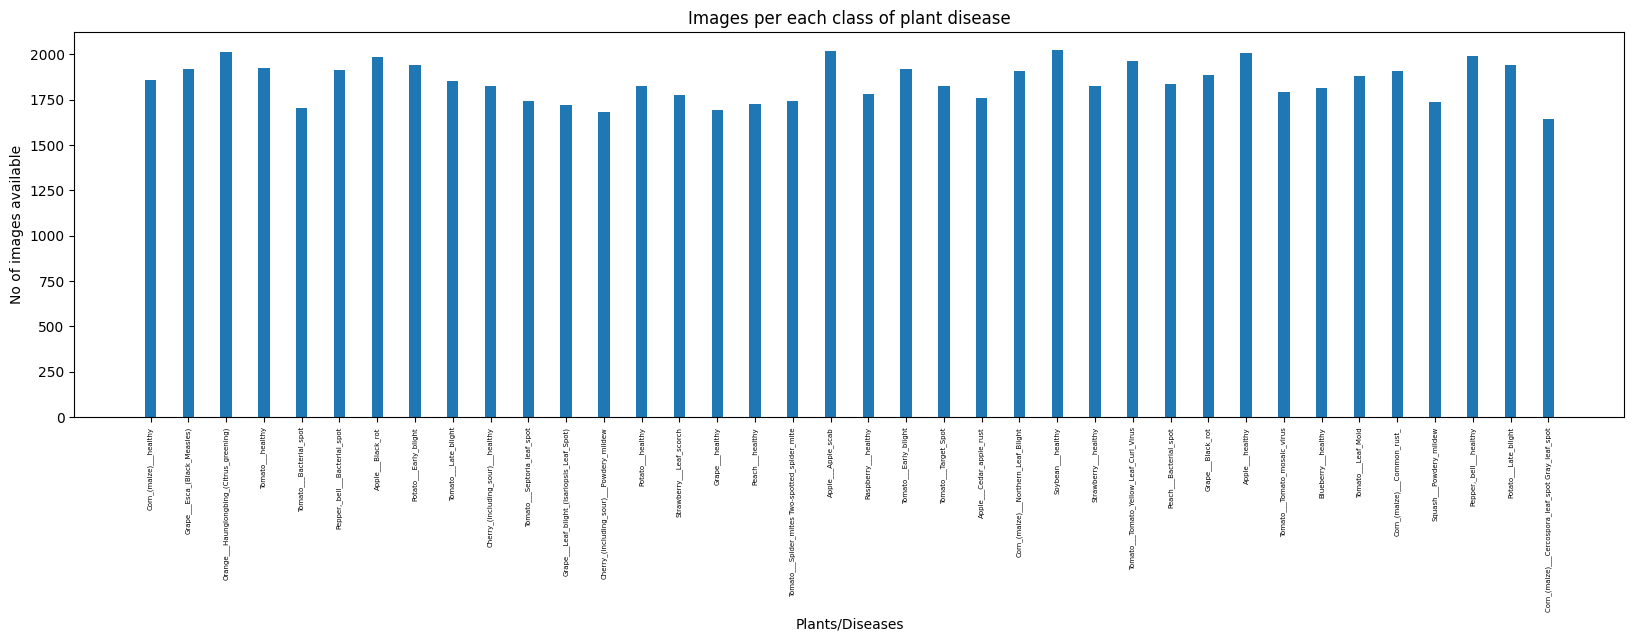

In [36]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, classes_train, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')


Images available for training

In [37]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


# Data Preprocessing

In [14]:
# Set up data generators for training and validation images with resizing, normalization, and data augmentation.

target_size = (100,100)

batch_size = 64


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [16]:
t_img, label = train_generator.next()

In [24]:
def plotimage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

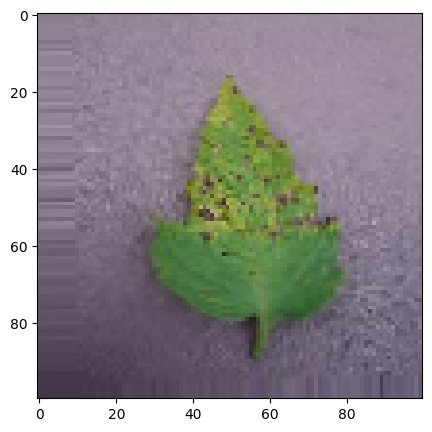

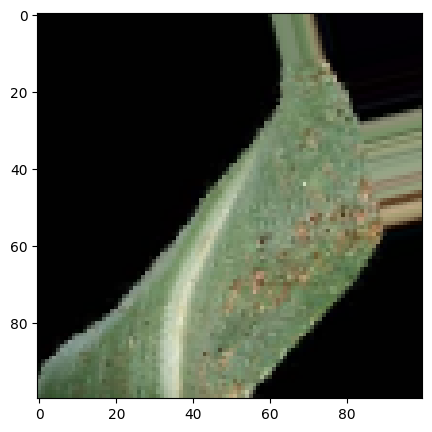

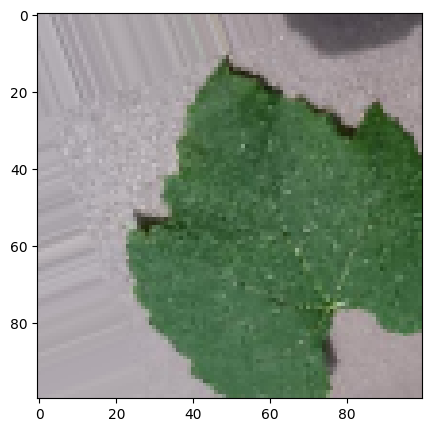

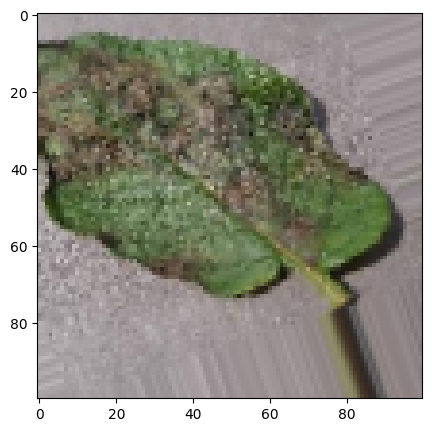

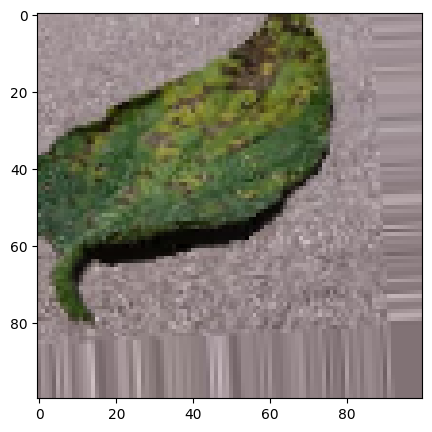

In [26]:
plotimage(t_img[:5], label[:5])

In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [51]:
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_classes = len(class_directories)
num_classes

38

In [52]:
# Create a convolutional neural network model consisting of multiple convolutional and pooling layers,
# followed by flattening, dense, dropout, and output layers, with specified activation functions and input shape.

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

In [53]:
# Compile the model with the Adam optimizer, categorical cross-entropy loss function,
# and accuracy metric for evaluation during training.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 128)       0

In [ ]:
# Train the model using the training data generator for a specified number of epochs,
# with steps per epoch determined by the length of the training generator,
# and validate using the validation data generator with steps determined by the length of the validation generator.

num_epochs = 15
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

Epoch 1/15
1099/1099 [==============================] - 331s 293ms/step - loss: 2.7985 - accuracy: 0.1986 - val_loss: 1.7261 - val_accuracy: 0.4680
Epoch 2/15
1099/1099 [==============================] - 308s 280ms/step - loss: 1.4282 - accuracy: 0.5604 - val_loss: 0.9510 - val_accuracy: 0.6905
Epoch 3/15
1099/1099 [==============================] - 305s 278ms/step - loss: 0.9729 - accuracy: 0.6980 - val_loss: 0.7142 - val_accuracy: 0.7667
Epoch 4/15
1099/1099 [==============================] - 307s 279ms/step - loss: 0.7306 - accuracy: 0.7734 - val_loss: 0.5824 - val_accuracy: 0.8119
Epoch 5/15
1099/1099 [==============================] - 306s 278ms/step - loss: 0.5932 - accuracy: 0.8184 - val_loss: 0.4391 - val_accuracy: 0.8596
Epoch 6/15
1099/1099 [==============================] - 305s 278ms/step - loss: 0.4721 - accuracy: 0.8547 - val_loss: 0.3361 - val_accuracy: 0.8926
Epoch 7/15
1099/1099 [==============================] - 309s 281ms/step - loss: 0.4097 - accuracy: 0.8749 - val_

In [ ]:
model.save("disease_identification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download("disease_identification.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Plotting Training and Validation Accuracy and loss**

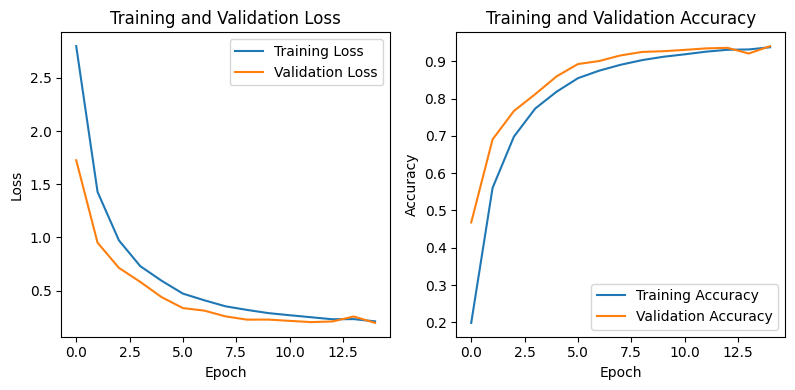

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()





**Conclusion**

In summary, leveraging TensorFlow, we have successfully constructed a plant disease prediction model achieving an accuracy of 94.05%. This model holds significant promise in accurately identifying and diagnosing plant diseases, thereby contributing to the enhancement of agricultural practices and crop yield.